# BINF-F401 - Computational Methods for Functional Genomics

## Question 1. Exploration of clinical variables

In [89]:
# Read the TSV file into a data frame
clinical_data <- read.table("clinical_data.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(clinical_data)
head(clinical_data)

,SMPLID,SUBJID,COHORT,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,TRISCHD,DTHVNT,DTHHRDY,SMPLID.1,IMGURL
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,GTEX.111YS.0526,GTEX.111YS,Organ Donor (OPO),1,62,72.0,227,30.78,NO_REPORT,74,1,0,GTEX-111YS-0525,https://brd.nci.nih.gov/brd/specimen/GTEX-111YS-0526
2,GTEX.1122O.1126,GTEX.1122O,Organ Donor (OPO),2,64,66.0,203,32.76,NO_REPORT,35,1,0,GTEX-1122O-1125,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-1126
3,GTEX.1128S.0326,GTEX.1128S,Postmortem,2,66,66.0,160,25.82,NO_REPORT,816,0,2,GTEX-1128S-0325,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0326
4,GTEX.117XS.0426,GTEX.117XS,Postmortem,1,64,71.0,220,30.68,NO_REPORT,848,0,2,GTEX-117XS-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-117XS-0426
5,GTEX.117YW.0226,GTEX.117YW,Postmortem,1,58,72.0,220,29.83,NO_REPORT,785,0,3,GTEX-117YW-0225,https://brd.nci.nih.gov/brd/specimen/GTEX-117YW-0226
6,GTEX.11DXX.0426,GTEX.11DXX,Organ Donor (OPO),2,66,64.5,128,21.63,NO_REPORT,56,1,0,GTEX-11DXX-0425,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0426


Here is a brief description of what each variable represents

- `AGE` is the age of the donor
- `SEX` is the sex of the donor
- `HGHT` is the height of the donor
- `WGHT` is the weight of the donor
- `BMI` is the Body Mass Index of the donor, which is defined as $\frac{\texttt{weight}}{\texttt{height}^2}$

Technical variables

- `COHORT` is a type of donor, there is 'Organ donor' and 'Postmortem'
- `TRISCHD` is the ischemic time (measured in minutes) and corresponds to the time elapsed bewteen the donor's death and tissue collection
- `DTHHRDY` is the Hardy scale. It is a number between $0$ and $4$ summarizing the circumstances of death
  
  * $0=$ death under ventilator
  * $1=$ violent and rapid death
  * $2=$ rapid death due to natural causes
  * $3=$ intermediate death
  * $4=$ slow death
 
Miscalleneous

- `SUBJID` is the GTEx ID of the subject
- `SMPLID` is the GTEx ID of the organ
- `SMPTHNTS` is a field indicating the sample's pathology notes taken by the pathologists who examined the histological slice
- `IMGURL` is a link to the interactively zoomable high resolution scan of the histological slice

In [228]:
any(clinical_data$SMPTHNTS!='NO_REPORT')

[1] FALSE

In [231]:
which(clinical_data$DTHVNT==1&clinical_data$DTHHRDY!=0)

[1]  18  22  51  71 156 167

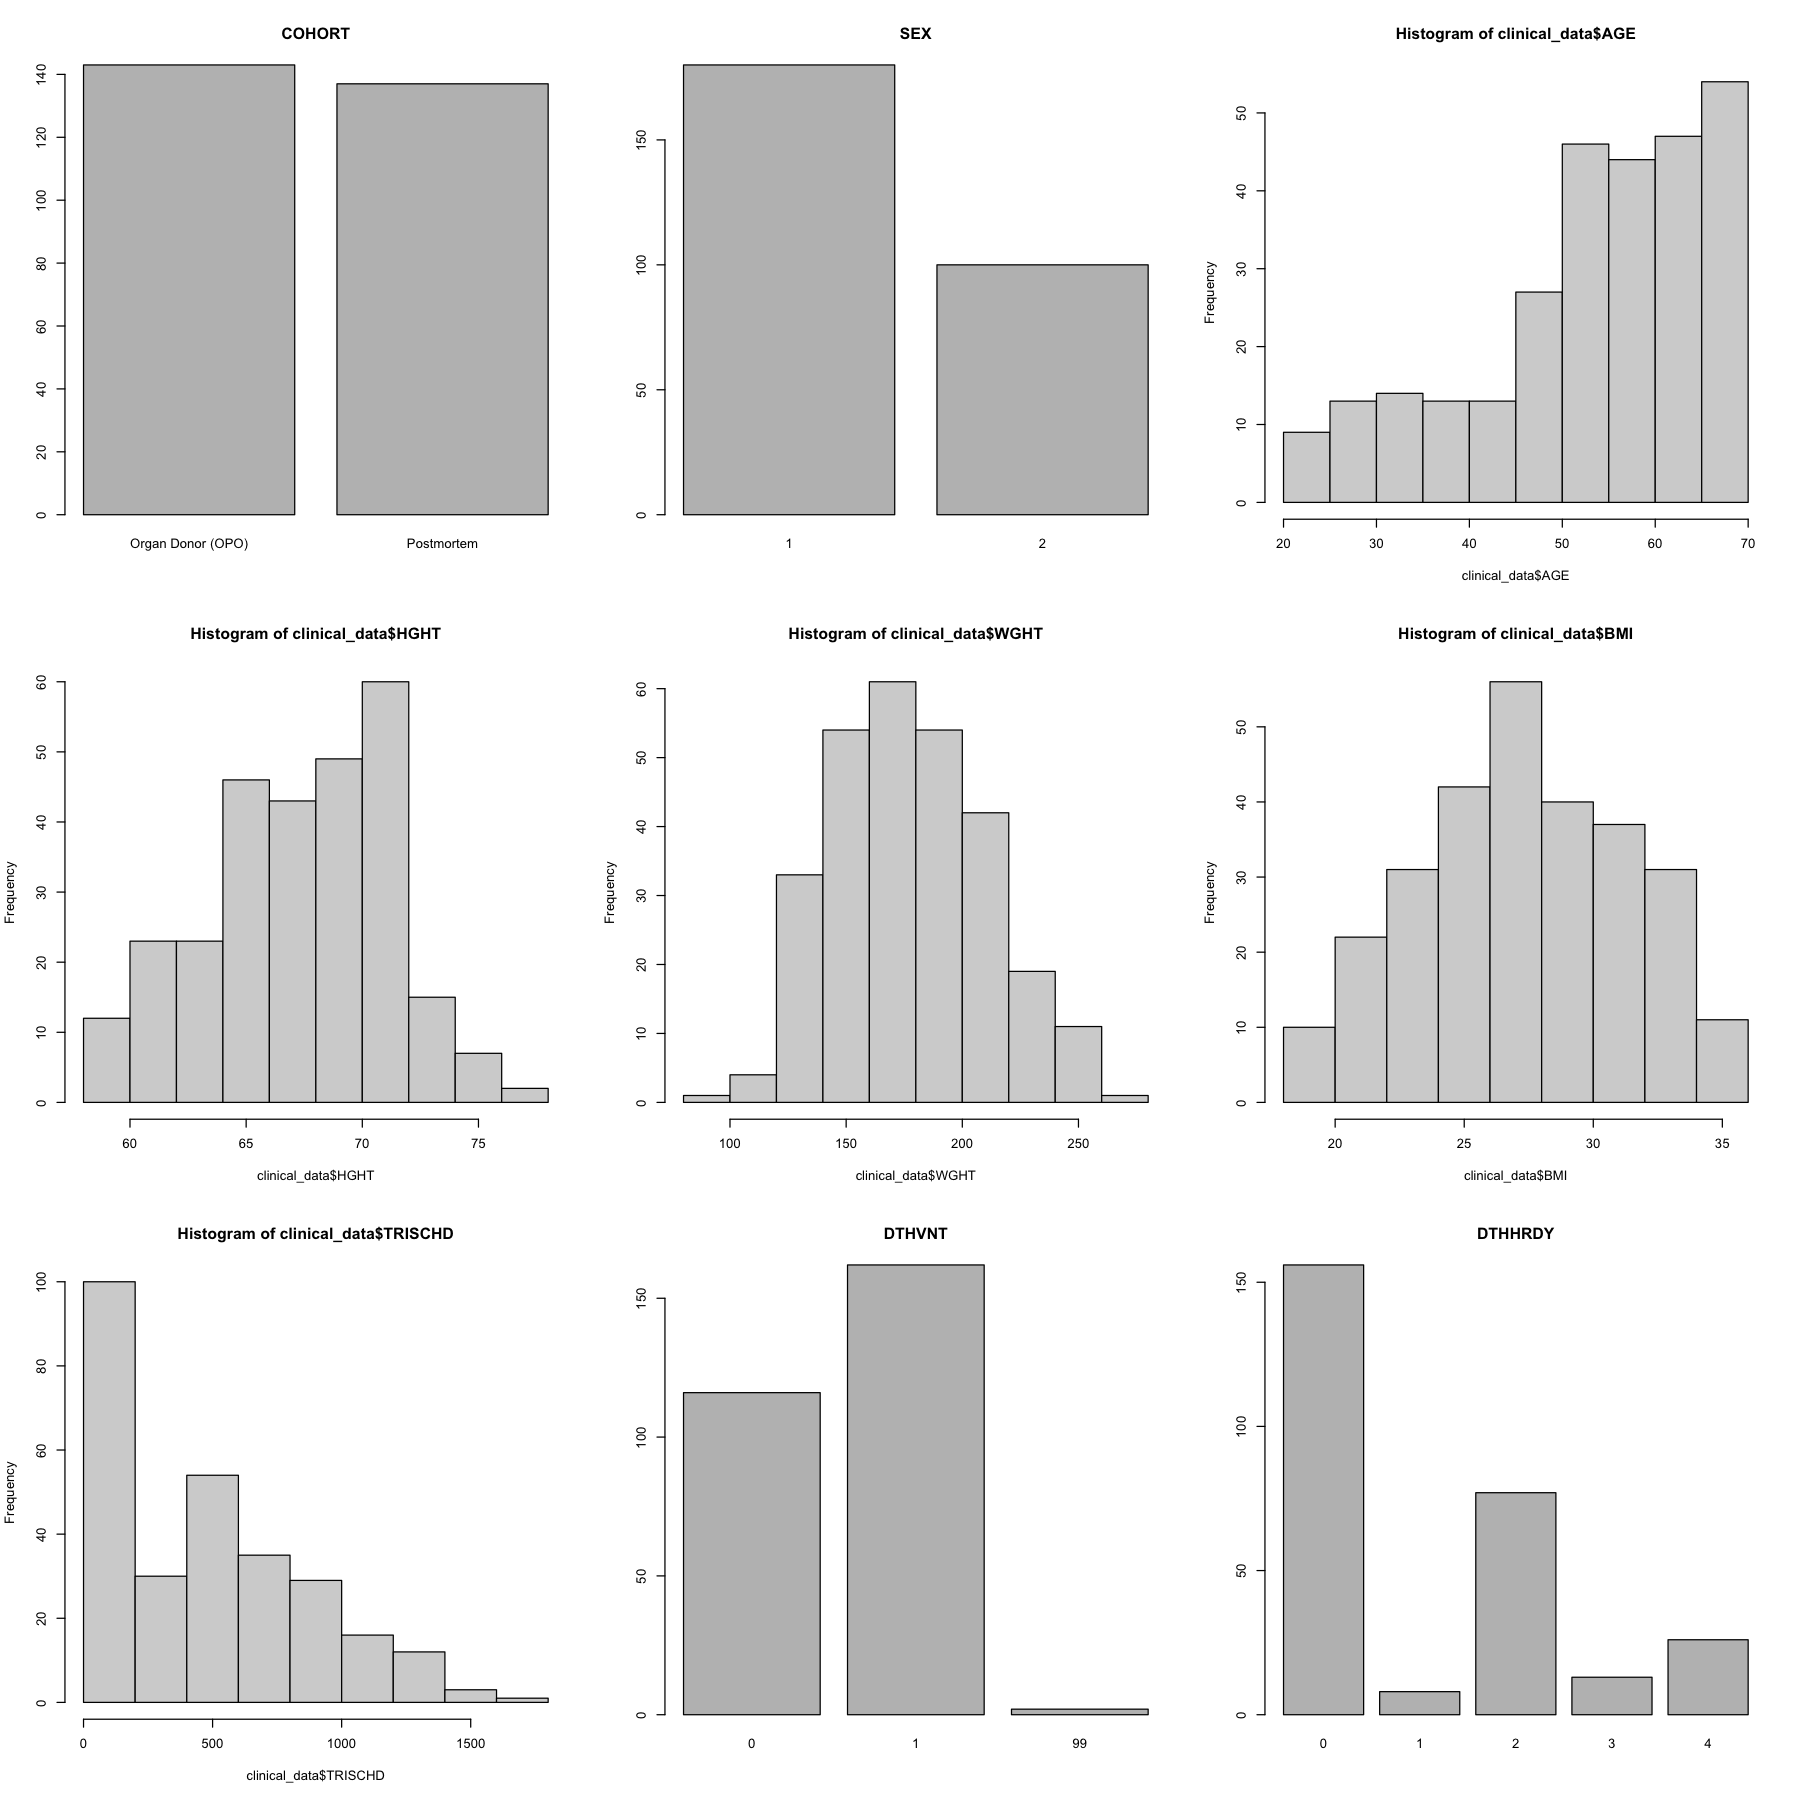

In [2]:
par(mfrow = c(3, 3)) 
options(repr.plot.width=15, repr.plot.height=15)

barplot(table(clinical_data$COHORT), main="COHORT")
barplot(table(clinical_data$SEX), main="SEX")
hist(clinical_data$AGE)
hist(clinical_data$HGHT)
hist(clinical_data$WGHT)
hist(clinical_data$BMI)
hist(clinical_data$TRISCHD)
barplot(table(clinical_data$DTHVNT), main="DTHVNT")
barplot(table(clinical_data$DTHHRDY), main="DTHHRDY")

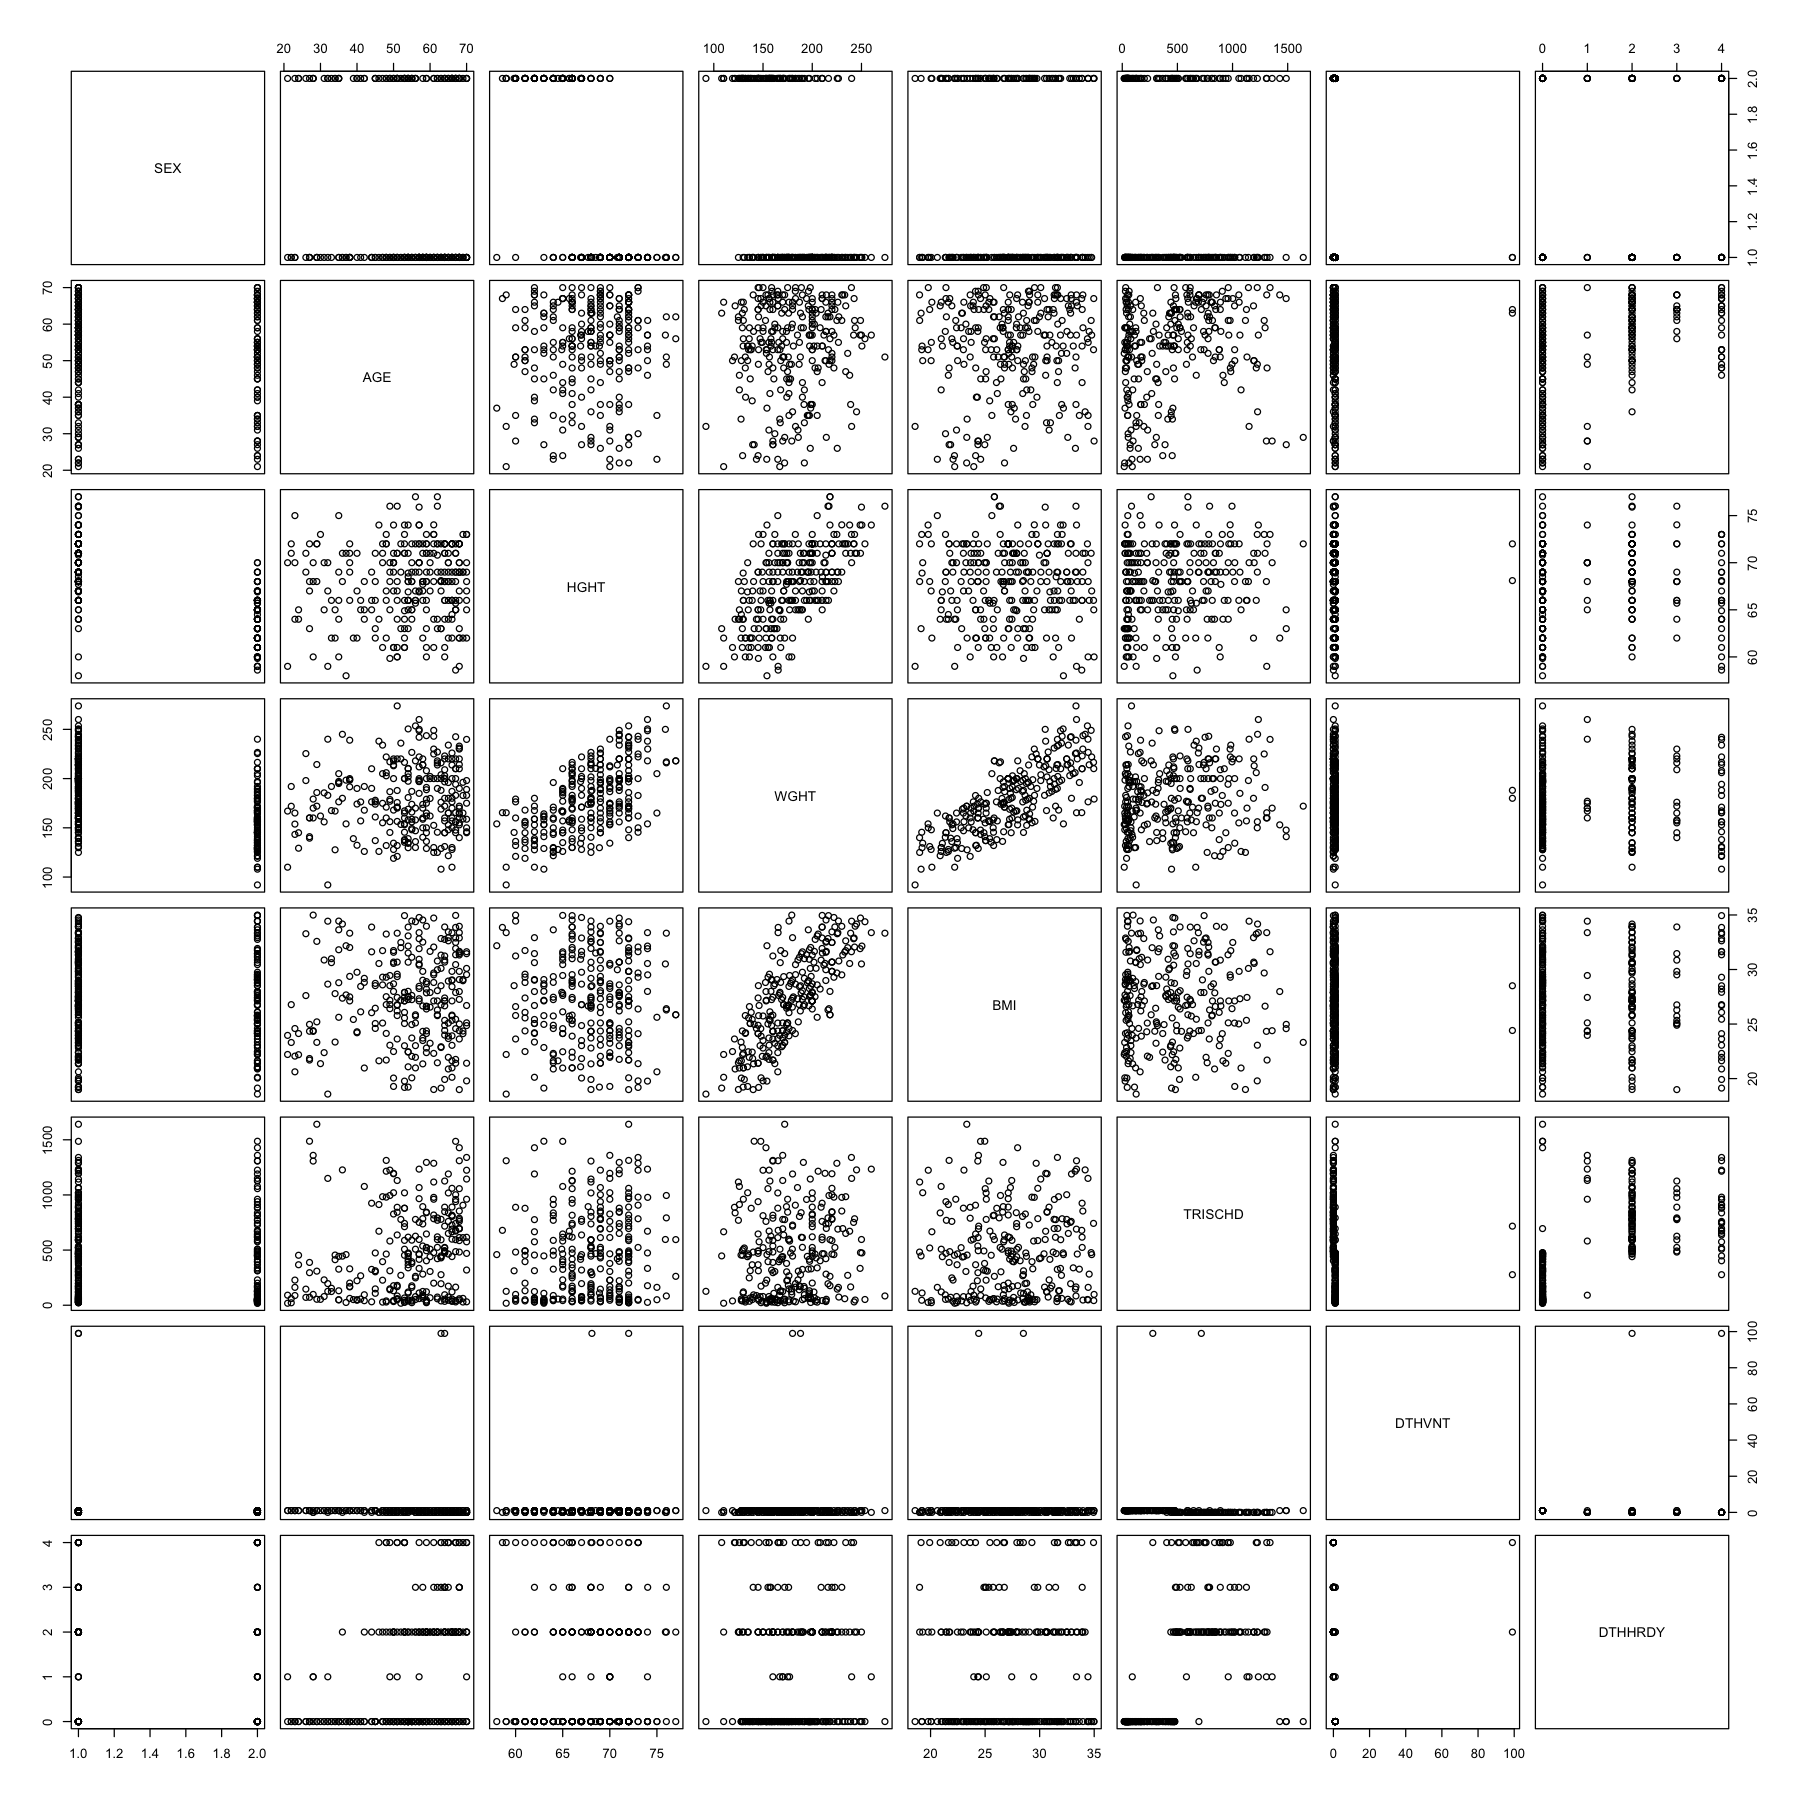

In [3]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(~ SEX + AGE + HGHT + WGHT + BMI + TRISCHD + DTHVNT + DTHHRDY, data=clinical_data)

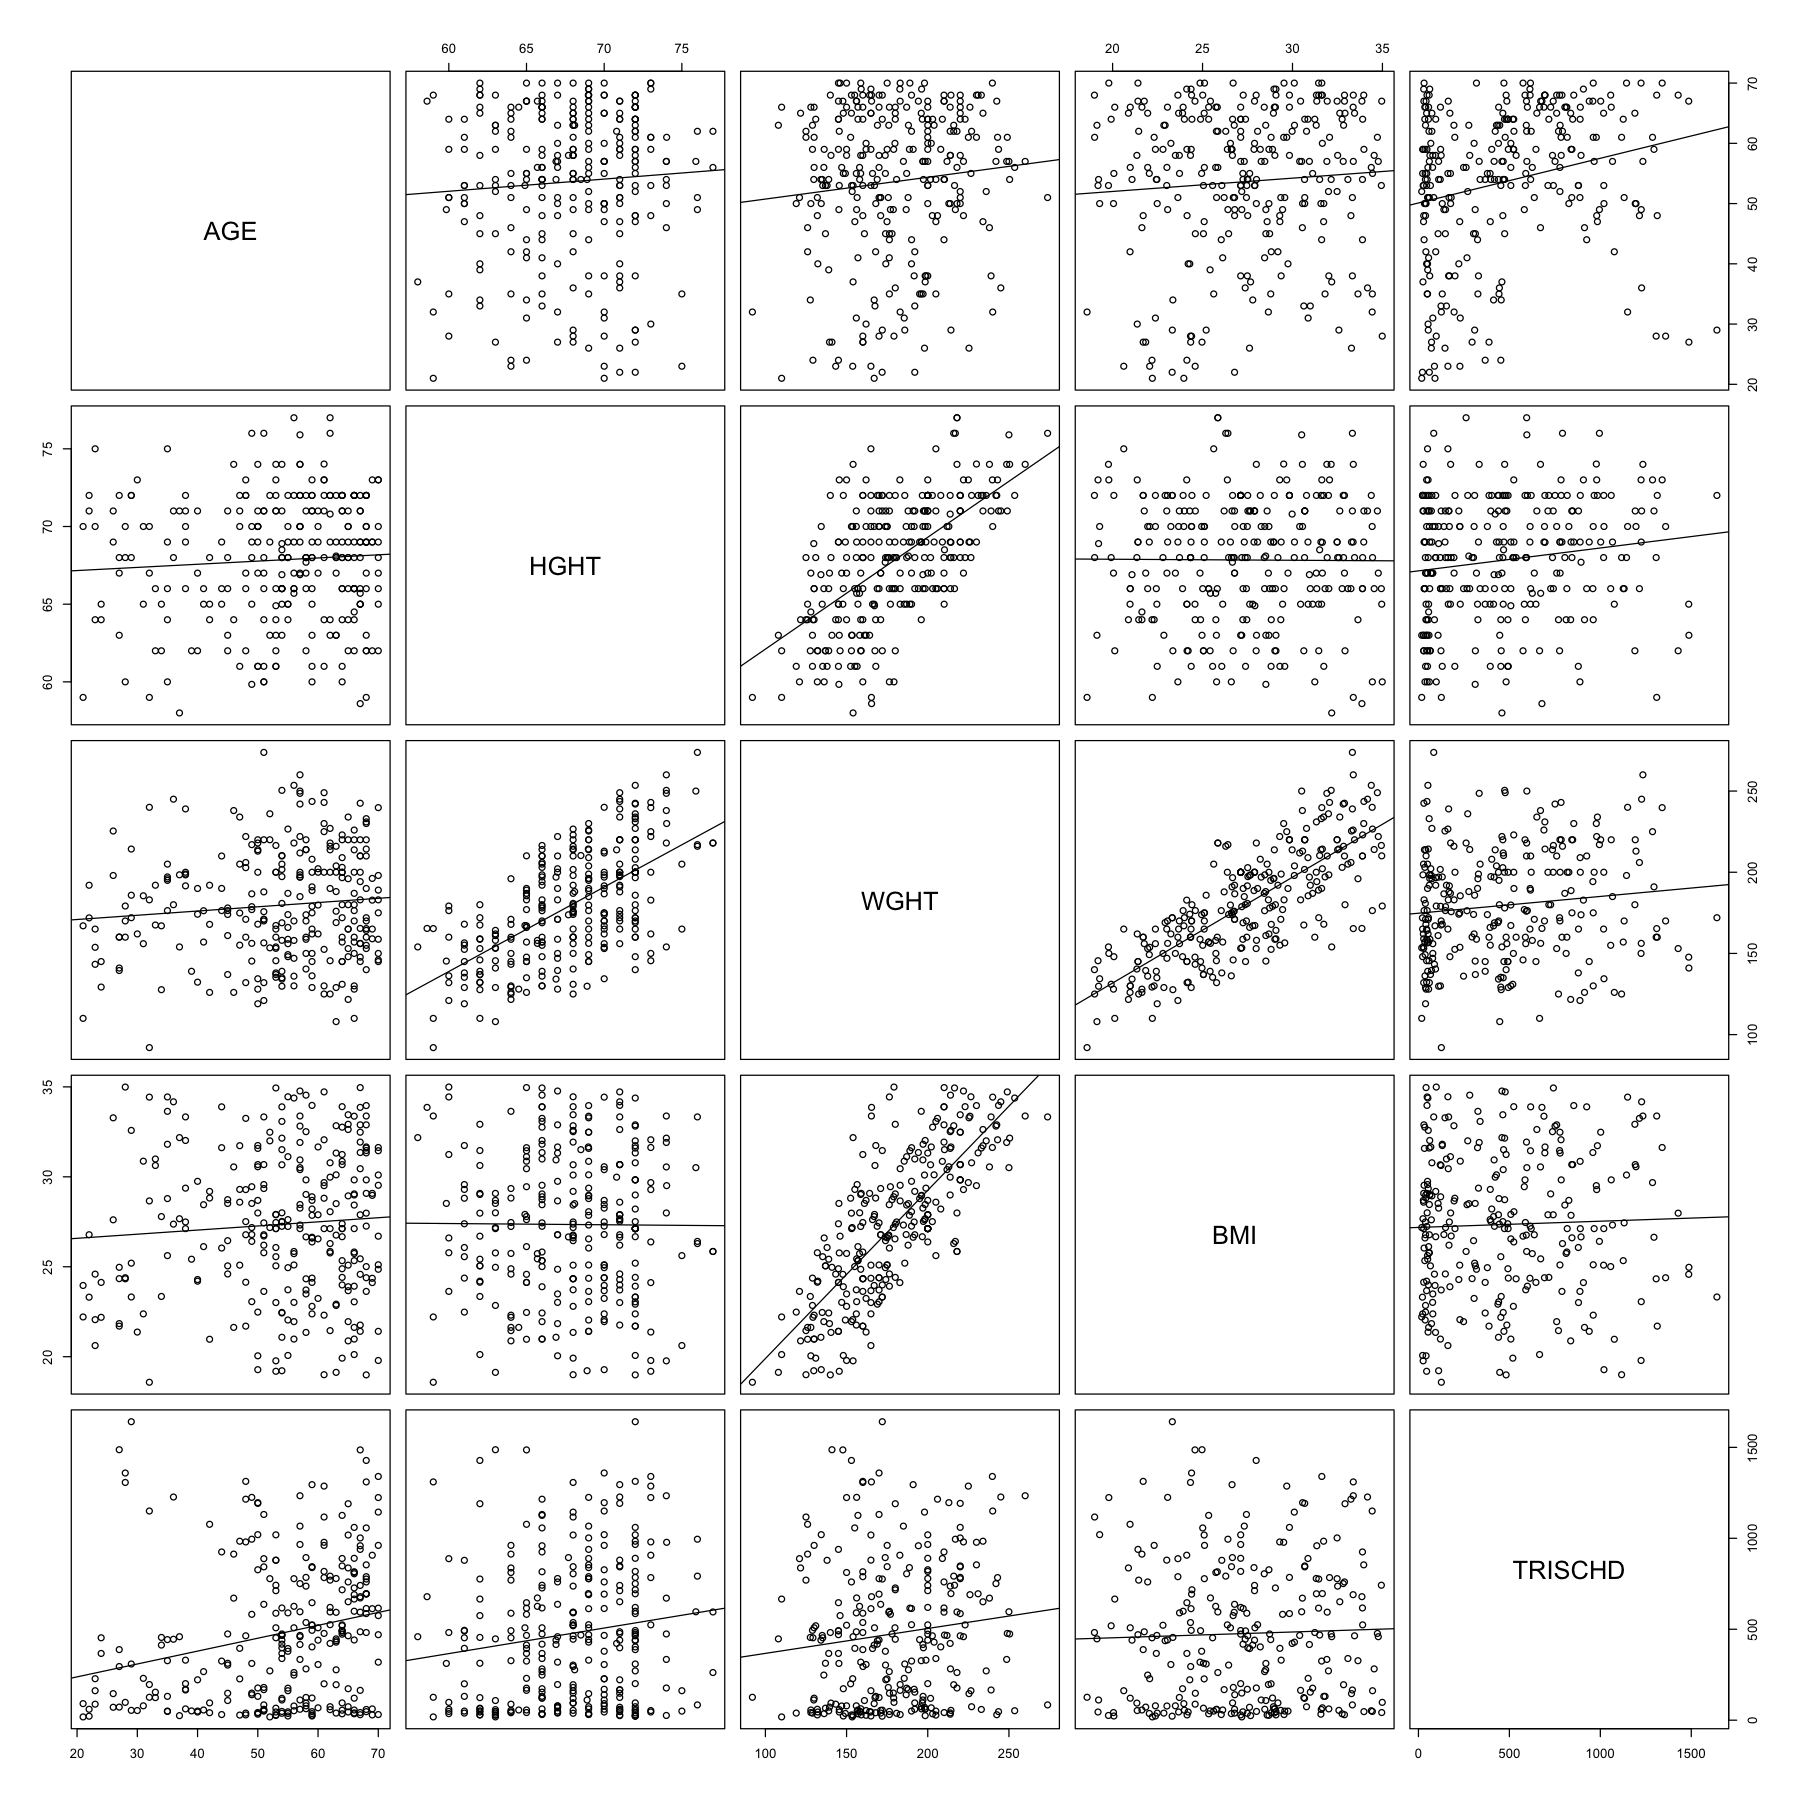

In [223]:
options(repr.plot.width=15, repr.plot.height=15)
pairs(~ AGE + HGHT + WGHT + BMI + TRISCHD, data=clinical_data, panel=function(x,y){
  points(x,y)
  linear_regression = lm(y~x)
  linear_regression_line = abline(linear_regression)
})

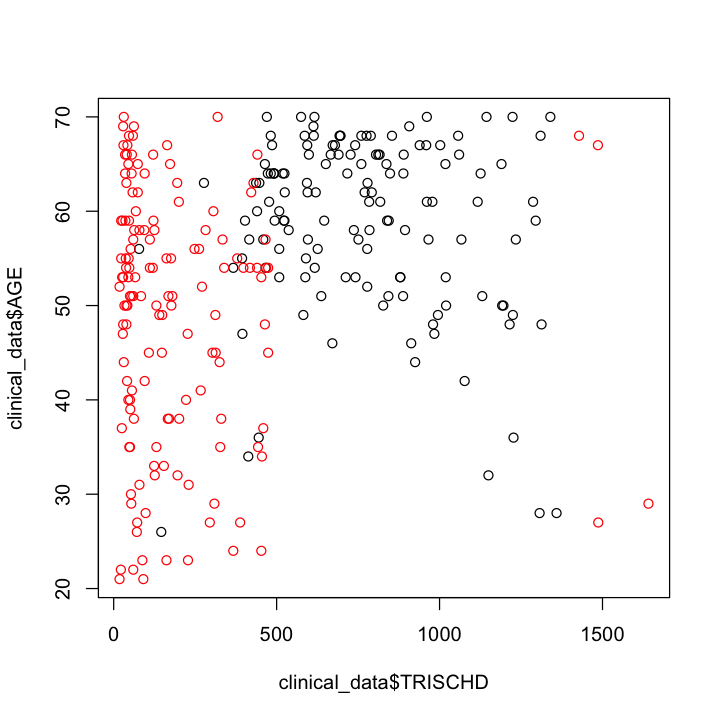

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
plot(clinical_data$TRISCHD, clinical_data$AGE, col = ifelse(clinical_data$COHORT == "Organ Donor (OPO)", "red", "black"))

In [6]:
install.packages("corrplot")
library("corrplot")


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


corrplot 0.92 loaded



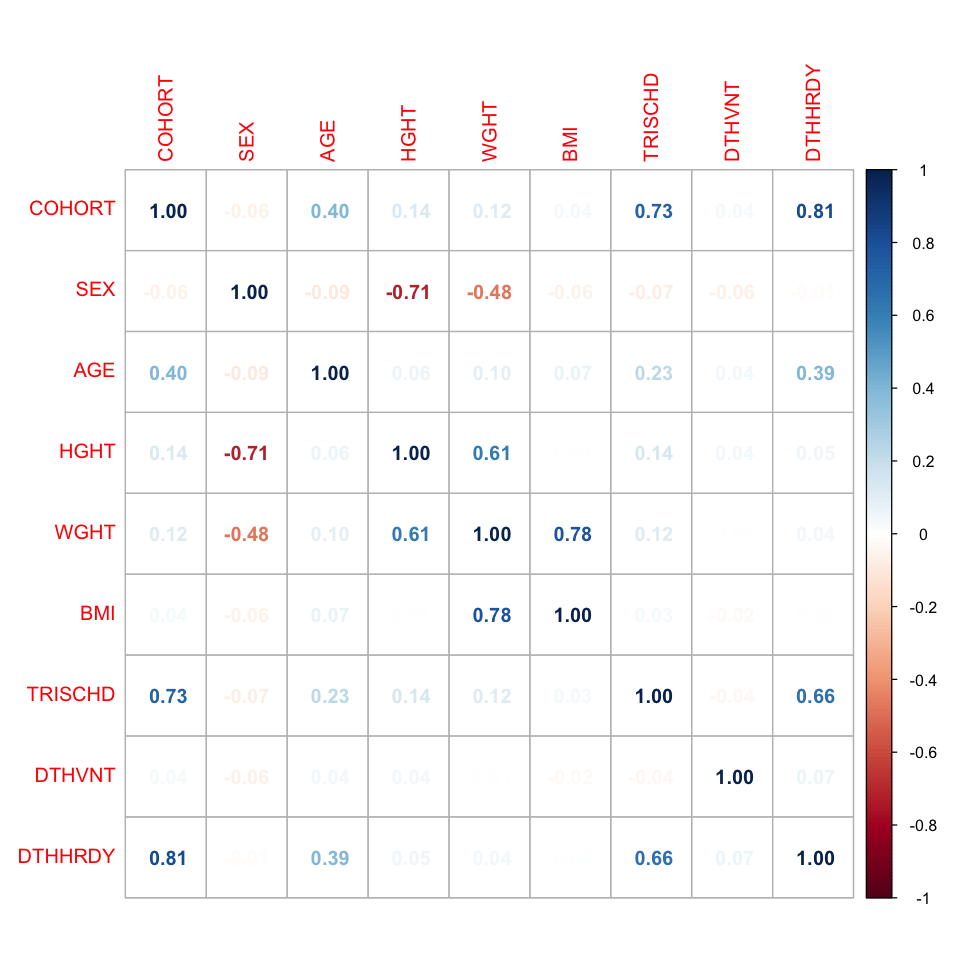

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

COHORT = as.numeric(factor(clinical_data$COHORT))
M = cor(cbind(COHORT,clinical_data[,c(4,5,6,7,8,10,11,12)]))
corrplot(M, method = 'number')

## Question 2. Clinical data vs morphology

In [131]:
# Read the TSV file into a data frame
morphological_counts_init <- read.table("morphological_counts_lunit_dino.tsv", header = TRUE, sep = "\t")

#Give proper names to the rows of the morphological counts matrix
rownames(morphological_counts_init)<-morphological_counts_init$SMPLID

In [133]:
morphological_counts<-t(morphological_counts_init[,-1])
head(morphological_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
Mophological.cluster.G4_0,137,96,2,339,171,2,1,392,40,260,⋯,2,39,0,77,6,32,5,94,460,1
Mophological.cluster.G4_1,88,880,552,1,0,10,239,18,424,235,⋯,286,34,277,271,537,7,18,228,314,308
Mophological.cluster.G4_2,417,236,211,151,36,258,850,14,605,164,⋯,541,634,333,193,208,2,26,79,43,102
Mophological.cluster.G4_3,1,393,1031,637,791,1558,282,10,135,2,⋯,35,109,339,408,72,24,194,83,7,73
Mophological.cluster.G4_4,1,21,174,1844,1011,850,41,316,94,344,⋯,0,46,260,63,3,184,398,158,2,7
Mophological.cluster.G4_5,32,214,216,473,234,48,206,57,58,313,⋯,412,28,248,78,48,200,10,219,246,95


In [187]:
coldata<-as.matrix(clinical_data[,-c(1,2,9,13,14)])
head(coldata)
nrow(coldata)
ncol(morphological_counts)

COHORT,SEX,AGE,HGHT,WGHT,BMI,TRISCHD,DTHVNT,DTHHRDY
Organ Donor (OPO),1,62,72.00,227.0000,30.78,74,1,0
Organ Donor (OPO),2,64,66.00,203.0000,32.76,35,1,0
Postmortem,2,66,66.00,160.0000,25.82,816,0,2
Postmortem,1,64,71.00,220.0000,30.68,848,0,2
Postmortem,1,58,72.00,220.0000,29.83,785,0,3
Organ Donor (OPO),2,66,64.50,128.0000,21.63,56,1,0


[1] 280

[1] 280

In [220]:
median(clinical_data$AGE)
median(clinical_data$HGHT)
median(clinical_data$WGHT)
median(clinical_data$BMI)

[1] 56

[1] 68

[1] 176.37

[1] 27.29

In [205]:
for (var in colnames(coldata)){
    object<-DESeqDataSetFromMatrix(countData = morphological_counts,
                                   colData = coldata,
                                   design = as.formula(paste("~",var)))
    assign(paste("dds_",var,sep=""),DESeq(object))
}

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

In [215]:
results(dds_COHORT)
results(dds_SEX)
results(dds_AGE)
results(dds_HGHT)
results(dds_WGHT)
results(dds_BMI)
results(dds_TRISCHD)
results(dds_DTHVNT)
results(dds_DTHHRDY)

log2 fold change (MLE): COHORT Postmortem vs Organ.Donor..OPO. 
Wald test p-value: COHORT Postmortem vs Organ.Donor..OPO. 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.G4_0    156.389       1.304265  0.256186   5.09109
Mophological.cluster.G4_1    303.370      -1.348875  0.232496  -5.80172
Mophological.cluster.G4_2    231.122      -1.060989  0.205341  -5.16696
Mophological.cluster.G4_3    283.896      -0.661617  0.244841  -2.70223
Mophological.cluster.G4_4    202.292       1.447160  0.263520   5.49165
...                              ...            ...       ...       ...
Mophological.cluster.G4_27  237.2334       0.413036 0.1983984   2.08185
Mophological.cluster.G4_28  270.9906      -0.425081 0.0795281  -5.34504
Mophological.cluster.G4_29  158.8522       1.132492 0.2547457   4.44558
Mophological.cluster.G4_30  137.5775       1.032

log2 fold change (MLE): SEX 2 vs 1 
Wald test p-value: SEX 2 vs 1 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.G4_0    156.389      -0.391594  0.275385 -1.421985
Mophological.cluster.G4_1    303.370       0.121652  0.252699  0.481410
Mophological.cluster.G4_2    231.122      -0.135407  0.221858 -0.610333
Mophological.cluster.G4_3    283.896       0.998103  0.252560  3.951942
Mophological.cluster.G4_4    202.292      -0.999761  0.281161 -3.555834
...                              ...            ...       ...       ...
Mophological.cluster.G4_27  237.2334     -0.1898764 0.2080606 -0.912601
Mophological.cluster.G4_28  270.9906     -0.0864049 0.0868274 -0.995134
Mophological.cluster.G4_29  158.8522     -0.5382884 0.2713547 -1.983708
Mophological.cluster.G4_30  137.5775     -0.0539964 0.1683233 -0.320790
Mophological.cluster.G4_31   10.

log2 fold change (MLE): AGE 70 vs 21 
Wald test p-value: AGE 70 vs 21 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.G4_0    156.389       4.161169   1.52007  2.737484
Mophological.cluster.G4_1    303.370       0.383341   1.56541  0.244881
Mophological.cluster.G4_2    231.122      -0.789513   1.35805 -0.581356
Mophological.cluster.G4_3    283.896       2.794248   1.60894  1.736700
Mophological.cluster.G4_4    202.292       2.716526   1.70849  1.590012
...                              ...            ...       ...       ...
Mophological.cluster.G4_27  237.2334      2.3593711  1.215065  1.941766
Mophological.cluster.G4_28  270.9906      0.0549369  0.534234  0.102833
Mophological.cluster.G4_29  158.8522      2.5659259  1.533785  1.672937
Mophological.cluster.G4_30  137.5775      0.3286098  0.974288  0.337282
Mophological.cluster.G4_31  

log2 fold change (MLE): HGHT 77.00 vs 58.00 
Wald test p-value: HGHT 77.00 vs 58.00 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE       stat
                           <numeric>      <numeric> <numeric>  <numeric>
Mophological.cluster.G4_0    156.389        4.86405   3.07770   1.580416
Mophological.cluster.G4_1    303.370        1.78561   2.50179   0.713733
Mophological.cluster.G4_2    231.122        1.56486   2.19979   0.711366
Mophological.cluster.G4_3    283.896        2.53127   2.49398   1.014952
Mophological.cluster.G4_4    202.292        8.66446   3.46442   2.500983
...                              ...            ...       ...        ...
Mophological.cluster.G4_27  237.2334      3.2503284  2.066591  1.5727972
Mophological.cluster.G4_28  270.9906      0.0195777  0.875265  0.0223677
Mophological.cluster.G4_29  158.8522      4.3338933  2.847170  1.5221758
Mophological.cluster.G4_30  137.5775      0.6630819  1.658773  0.3997424
Mo

log2 fold change (MLE): WGHT 273.8140 vs .92.0000 
Wald test p-value: WGHT 273.8140 vs .92.0000 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE         stat
                           <numeric>      <numeric> <numeric>    <numeric>
Mophological.cluster.G4_0    156.389      3.5796998   19.0767  0.187647518
Mophological.cluster.G4_1    303.370      1.6714027   19.0612  0.087686100
Mophological.cluster.G4_2    231.122     -0.0168193   19.0612 -0.000882387
Mophological.cluster.G4_3    283.896     -3.7847211   19.0726 -0.198437597
Mophological.cluster.G4_4    202.292      3.8663266   19.1742  0.201642035
...                              ...            ...       ...          ...
Mophological.cluster.G4_27  237.2334      -8.178930   19.1706   -0.4266390
Mophological.cluster.G4_28  270.9906       0.633759   19.0612    0.0332486
Mophological.cluster.G4_29  158.8522       5.509670   19.1039    0.2884049
Mophological.cluster.G4_30  137.5775     

log2 fold change (MLE): BMI 34.99 vs 18.58 
Wald test p-value: BMI 34.99 vs 18.58 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE        stat
                           <numeric>      <numeric> <numeric>   <numeric>
Mophological.cluster.G4_0    156.389      0.0405949   18.9768  0.00213918
Mophological.cluster.G4_1    303.370     -1.5973843   18.9613 -0.08424433
Mophological.cluster.G4_2    231.122      0.0312971   18.9604  0.00165066
Mophological.cluster.G4_3    283.896      3.4684656   18.9613  0.18292312
Mophological.cluster.G4_4    202.292      6.3273029   19.0533  0.33208361
...                              ...            ...       ...         ...
Mophological.cluster.G4_27  237.2334      2.3425782   18.9613  0.12354532
Mophological.cluster.G4_28  270.9906      0.0805204   18.9605  0.00424674
Mophological.cluster.G4_29  158.8522      2.2130202   18.9858  0.11656206
Mophological.cluster.G4_30  137.5775      1.6758517   18.9627  0.0

log2 fold change (MLE): TRISCHD 1641 vs ..18 
Wald test p-value: TRISCHD 1641 vs ..18 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE       stat
                           <numeric>      <numeric> <numeric>  <numeric>
Mophological.cluster.G4_0    156.389      -7.829071   16.7793 -0.4665910
Mophological.cluster.G4_1    303.370      -0.283038   16.6546 -0.0169946
Mophological.cluster.G4_2    231.122       1.396788   16.6546  0.0838680
Mophological.cluster.G4_3    283.896       2.647665   16.6551  0.1589707
Mophological.cluster.G4_4    202.292      -5.295469   16.6754 -0.3175626
...                              ...            ...       ...        ...
Mophological.cluster.G4_27  237.2334      -2.101197   16.6612 -0.1261135
Mophological.cluster.G4_28  270.9906      -0.526152   16.6547 -0.0315918
Mophological.cluster.G4_29  158.8522      -3.053583   16.6869 -0.1829923
Mophological.cluster.G4_30  137.5775      -1.798125   16.6550 -0.1079633


log2 fold change (MLE): DTHVNT 99 vs .0 
Wald test p-value: DTHVNT 99 vs .0 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.G4_0    156.389      -3.780589   1.56207 -2.420235
Mophological.cluster.G4_1    303.370       0.681187   1.39390  0.488691
Mophological.cluster.G4_2    231.122      -1.901330   1.23104 -1.544488
Mophological.cluster.G4_3    283.896       0.271256   1.46391  0.185295
Mophological.cluster.G4_4    202.292      -2.910585   1.58426 -1.837194
...                              ...            ...       ...       ...
Mophological.cluster.G4_27  237.2334      -0.232491  1.182846 -0.196552
Mophological.cluster.G4_28  270.9906       1.260490  0.461125  2.733510
Mophological.cluster.G4_29  158.8522      -0.953147  1.539442 -0.619151
Mophological.cluster.G4_30  137.5775      -0.982205  0.908002 -1.081721
Mophological.cluster.G

log2 fold change (MLE): DTHHRDY 4 vs 0 
Wald test p-value: DTHHRDY 4 vs 0 
DataFrame with 32 rows and 6 columns
                            baseMean log2FoldChange     lfcSE      stat
                           <numeric>      <numeric> <numeric> <numeric>
Mophological.cluster.G4_0    156.389       1.106705  0.461510  2.398011
Mophological.cluster.G4_1    303.370      -0.736883  0.411424 -1.791056
Mophological.cluster.G4_2    231.122      -0.681635  0.364306 -1.871050
Mophological.cluster.G4_3    283.896      -1.156195  0.434168 -2.663014
Mophological.cluster.G4_4    202.292      -0.151179  0.464471 -0.325486
...                              ...            ...       ...       ...
Mophological.cluster.G4_27  237.2334       0.492258  0.350674   1.40375
Mophological.cluster.G4_28  270.9906      -0.297410  0.139136  -2.13754
Mophological.cluster.G4_29  158.8522       1.132323  0.456861   2.47849
Mophological.cluster.G4_30  137.5775       0.532243  0.265596   2.00395
Mophological.cluster.G4_

## Question 3. Morphology vs gene expression

In [125]:
# Read the TSV file into a data frame
RNA_read_counts_init <- read.table("RNA_read_counts.tsv", header = TRUE, sep = "\t")

# Display the first few rows of the data frame to verify it was read correctly
#head(RNA_read_counts)
dim(RNA_read_counts_init)
head(RNA_read_counts_init)

[1] 56200   282

,Name,Description,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000223972.5,DDX11L1,0,0,0,0,0,5,0,0,⋯,1,0,0,3,0,0,0,0,0,1
2,ENSG00000227232.5,WASH7P,78,70,180,78,152,76,132,143,⋯,134,142,140,69,183,61,157,103,57,70
3,ENSG00000278267.1,MIR6859-1,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,0
4,ENSG00000243485.5,MIR1302-2HG,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
5,ENSG00000237613.2,FAM138A,1,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,ENSG00000268020.3,OR4G4P,1,0,0,1,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0


In [129]:
rownames(RNA_read_counts_init)<-RNA_read_counts_init$Name
RNA_read_counts<-as.matrix(RNA_read_counts_init[,-c(1,2)])
head(RNA_read_counts)

,GTEX.111YS.0526,GTEX.1122O.1126,GTEX.1128S.0326,GTEX.117XS.0426,GTEX.117YW.0226,GTEX.11DXX.0426,GTEX.11DXZ.0426,GTEX.11DYG.1226,GTEX.11EM3.0226,GTEX.11EMC.0926,⋯,GTEX.1R9K5.1426,GTEX.1R9PM.0326,GTEX.1R9PN.0226,GTEX.1R9PO.0226,GTEX.1RAZA.1126,GTEX.1RAZR.0626,GTEX.1RNTQ.0726,GTEX.1RQED.1126,GTEX.1S3DN.0626,GTEX.1S5ZA.1126
ENSG00000223972.5,0,0,0,0,0,5,0,0,0,0,⋯,1,0,0,3,0,0,0,0,0,1
ENSG00000227232.5,78,70,180,78,152,76,132,143,88,143,⋯,134,142,140,69,183,61,157,103,57,70
ENSG00000278267.1,0,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
ENSG00000243485.5,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
ENSG00000237613.2,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
ENSG00000268020.3,1,0,0,1,0,0,2,0,4,1,⋯,0,0,0,0,0,0,0,0,0,0


Let $X=\{x_1,\ldots,x_n\}$ be a sample of a univariate random variable. The _mean absolute deviation_ of $X$ is defined as the median of the absolute deviations from the sample's median, or in symbolic form

\begin{equation*}
\mathrm{MAD}=\mathrm{median}(\{\vert x_i-\mathrm{median}(X)\vert\,\vert\,i=1,\ldots,n\})
\end{equation*}

In [151]:
MAD<-numeric(nrow(RNA_read_counts))
for (i in 1:nrow(RNA_read_counts)){
    MAD[i]<-mad(RNA_read_counts[i,])
}
#Get the indices of the transcripts which are extremely little expressed
rows_to_remove<-which(MAD==0)

In [221]:
summary(MAD)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.7    393.5     48.9 394697.8 

In [135]:
morphological_counts_init[-1]

,Mophological.cluster.G4_0,Mophological.cluster.G4_1,Mophological.cluster.G4_2,Mophological.cluster.G4_3,Mophological.cluster.G4_4,Mophological.cluster.G4_5,Mophological.cluster.G4_6,Mophological.cluster.G4_7,Mophological.cluster.G4_8,Mophological.cluster.G4_9,⋯,Mophological.cluster.G4_22,Mophological.cluster.G4_23,Mophological.cluster.G4_24,Mophological.cluster.G4_25,Mophological.cluster.G4_26,Mophological.cluster.G4_27,Mophological.cluster.G4_28,Mophological.cluster.G4_29,Mophological.cluster.G4_30,Mophological.cluster.G4_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX.111YS.0526,137,88,417,1,1,32,1,1,1,167,⋯,262,233,31,417,80,144,250,664,20,0
GTEX.1122O.1126,96,880,236,393,21,214,1,47,39,291,⋯,3350,99,190,495,278,774,694,268,145,0
GTEX.1128S.0326,2,552,211,1031,174,216,289,0,493,663,⋯,831,135,250,161,82,120,377,2,500,0
GTEX.117XS.0426,339,1,151,637,1844,473,260,3,440,153,⋯,148,166,43,49,158,211,184,142,277,3
GTEX.117YW.0226,171,0,36,791,1011,234,162,0,54,129,⋯,106,68,1,0,76,489,68,281,254,6
GTEX.11DXX.0426,2,10,258,1558,850,48,0,11,2491,325,⋯,8,89,952,0,26,197,323,5,70,0
GTEX.11DXZ.0426,1,239,850,282,41,206,1,370,839,291,⋯,138,342,1459,64,491,38,310,3,46,4
GTEX.11DYG.1226,392,18,14,10,316,57,742,5,232,123,⋯,12,124,129,1,116,254,238,483,185,8
GTEX.11EM3.0226,40,424,605,135,94,58,861,4,11,349,⋯,134,285,637,49,304,143,558,27,542,0


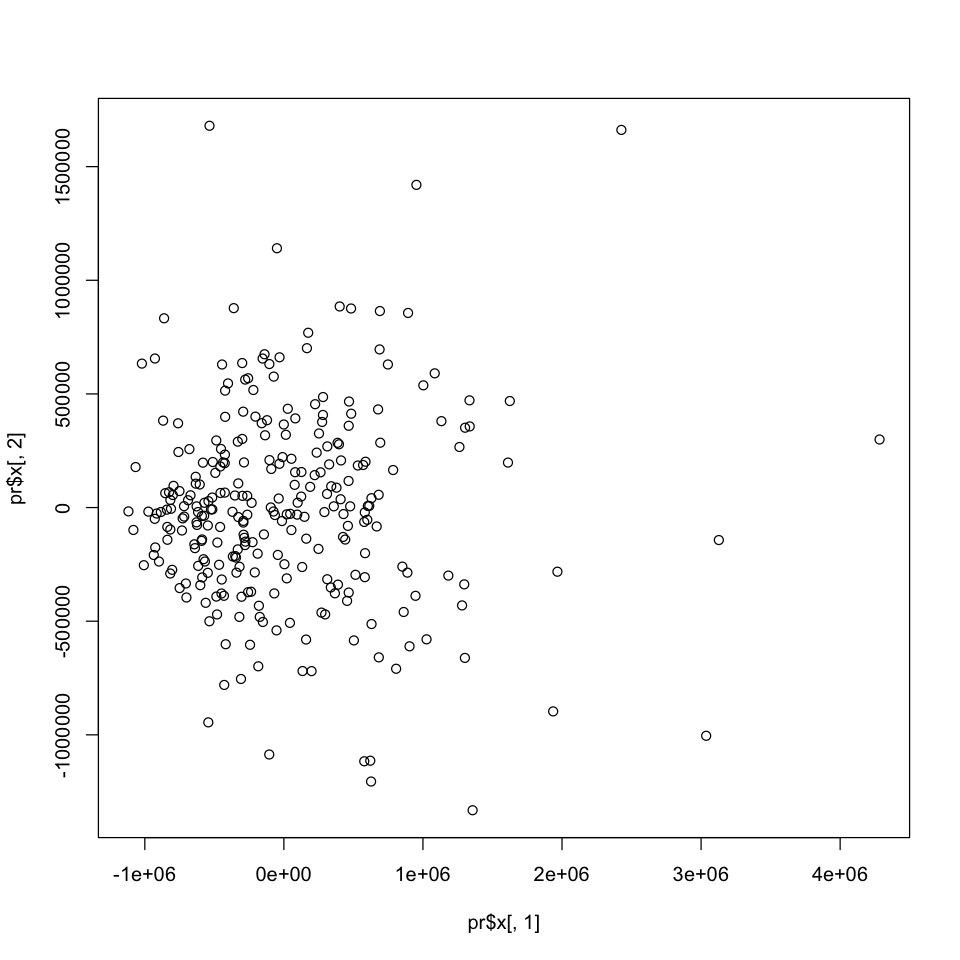

In [130]:
pr = prcomp(t(RNA_read_counts))
plot(pr$x[,1],pr$x[,2])

In [10]:
summary(pr)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7.238e+05 4.303e+05 4.107e+05 2.172e+05 1.806e+05
Proportion of Variance 4.182e-01 1.478e-01 1.346e-01 3.765e-02 2.604e-02
Cumulative Proportion  4.182e-01 5.660e-01 7.006e-01 7.383e-01 7.643e-01
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     1.717e+05 1.547e+05 1.394e+05 1.382e+05 1.288e+05
Proportion of Variance 2.352e-02 1.911e-02 1.552e-02 1.525e-02 1.325e-02
Cumulative Proportion  7.879e-01 8.070e-01 8.225e-01 8.377e-01 8.510e-01
                            PC11      PC12      PC13      PC14      PC15
Standard deviation     1.230e+05 1.141e+05 1.126e+05 1.054e+05 9.733e+04
Proportion of Variance 1.207e-02 1.040e-02 1.012e-02 8.870e-03 7.560e-03
Cumulative Proportion  8.630e-01 8.734e-01 8.836e-01 8.924e-01 9.000e-01
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     9.

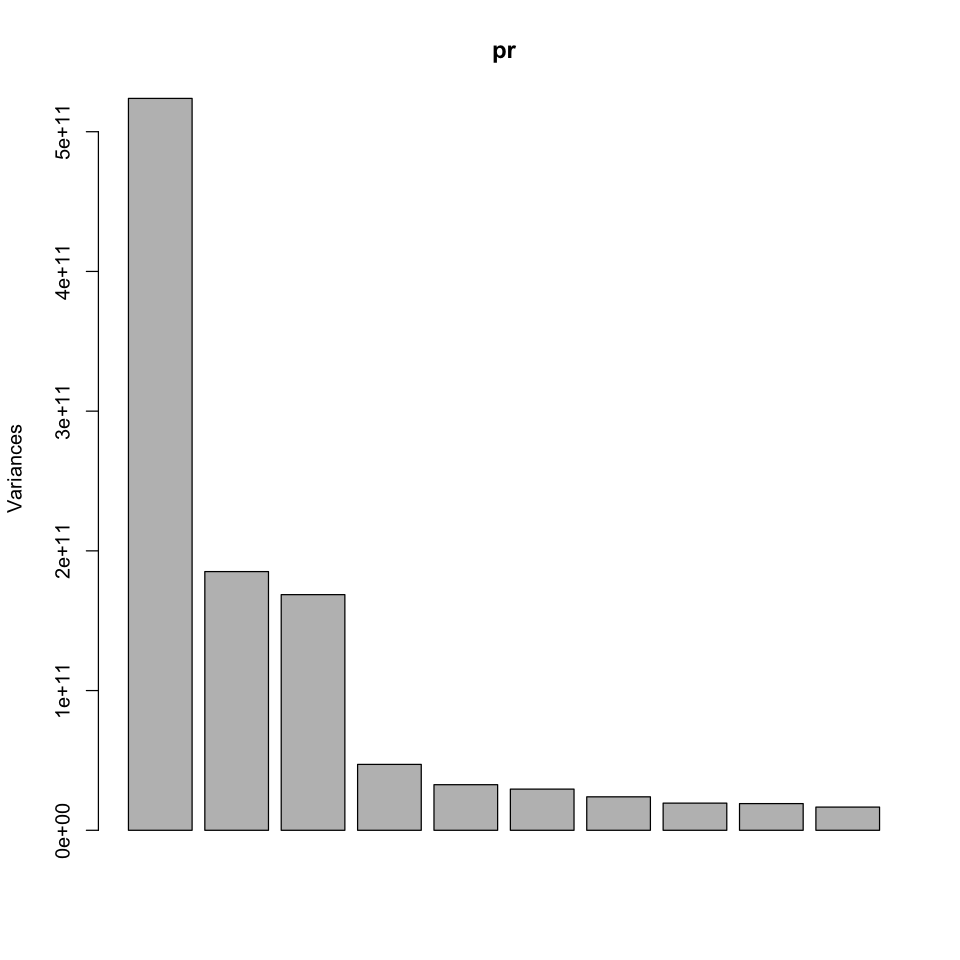

In [11]:
plot(pr)

In [14]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'DESeq2'




Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


Old packages: 'BH', 'BiocFileCache', 'BiocManager', 'biomaRt', 'Biostrings',
  'boot', 'brew', 'brio', 'broom', 'broom.helpers', 'BSgenome', 'bslib',
  'cachem', 'callr', 'codetools', 'commonmark', 'curl', 'data.table', 'DBI',
  'dbplyr', 'deldir', 'digest', 'edgeR', 'farver', 'fastmap', 'forecast', 'fs',
  'GenomeInfoDb', 'GenomicAlignments', 'GenomicFeatures', 'ggplot2', 'ggstats',
  'gh', 'glue', 'gtable', 'htmltools', 'httpuv', 'httr2', 'interp',
  'KernSmooth', 'knitr', 'labelled', 'lattice', 'lda', 'locfit', 'matrixStats',
  'mboost', 'mgcv', 'munsell', 'openssl', 'pbdZMQ', 'pixmap', 'pkgbuild',
  'pkgdown', 'pkgload', 'processx', 'promises', 'ps', 'R.oo', 'ragg', 'Rcpp',
  'RcppArmadillo', 'RcppEigen', 'RCurl', 'readr', 'remotes', 'repr', 'Rhtslib',
  'rlang', 'rmarkdown', 'roxygen2', 'RSQLite', 'rstudioapi', 'Rsubread',
  'rvest', 'S4Arrays', 'sass', 'segmented', 'shiny', 'sm', 'sp', 'SparseArray',
  'stringi', 'survival', 'systemfonts', 'testthat', 'tidyr', 'tidyselect',
  'ti

In [16]:
library(DESeq2)

Warning message:
“le package ‘DESeq2’ a été compilé avec la version R 4.3.3”
Le chargement a nécessité le package : S4Vectors

Warning message:
“le package ‘S4Vectors’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics


Attachement du package : ‘BiocGenerics’


Les objets suivants sont masqués depuis ‘package:stats’:

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attachement du package : ‘S4Vectors’


L'objet suivant est masqué depuis ‘package:utils’:

    findMat

In [222]:
install.packages("pheatmap")
library(pheatmap)
pheatmap(RNA_read_counts, scale = 'row', show_rownames = FALSE)


Les packages binaires téléchargés sont dans
	/var/folders/df/d1fmsmr16731rc5wzhnmrp6c0000gn/T//Rtmp9zount/downloaded_packages


## The theory behind DESeq2